# Carregamento da base de dados

This database of faces was downloaded from YALE University in the United States.

http://vision.ucsd.edu/content/yale-face-database

In [1]:
from PIL import Image  # trabalharmos com processamento de imagem digital;
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

In [2]:
import zipfile  # descompactar o arquivo com as imagens compactadas;
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

# **Image Processing**

In [3]:
import os
print(os.listdir('/content/yalefaces/train'))  # nos mostra tudo que está no diretório;

['subject11.rightlight.gif', 'subject05.normal.gif', 'subject11.centerlight.gif', 'subject12.sleepy.gif', 'subject06.rightlight.gif', 'subject09.normal.gif', 'subject12.happy.gif', 'subject06.glasses.gif', 'subject11.noglasses.gif', 'subject12.leftlight.gif', 'subject14.happy.gif', 'subject03.centerlight.gif', 'subject10.leftlight.gif', 'subject12.surprised.gif', 'subject04.sleepy.gif', 'subject07.surprised.gif', 'subject12.glasses.gif', 'subject13.wink.gif', 'subject06.sad.gif', 'subject02.rightlight.gif', 'subject09.leftlight.gif', 'subject04.centerlight.gif', 'subject15.happy.gif', 'subject01.sad.gif', 'subject15.glasses.gif', 'subject02.surprised.gif', 'subject03.rightlight.gif', 'subject11.wink.gif', 'subject02.happy.gif', 'subject02.sleepy.gif', 'subject13.rightlight.gif', 'subject10.rightlight.gif', 'subject02.noglasses.gif', 'subject08.surprised.gif', 'subject15.normal.gif', 'subject05.leftlight.gif', 'subject14.rightlight.gif', 'subject14.leftlight.gif', 'subject14.centerlight

In [4]:
def get_image_data():  # função para extração dos pixels;
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')] # estamos fazendo a juntada do nome da imagem com o diretório;
  #print(paths)                                                                                    
  faces = []
  ids = []                                       # o nome de cada pessoa é dados pelos números, dentro da váriavel ids iremos buscar os nomes;
  for path in paths:                             # para percorrer cada imagem;   
    imagem = Image.open(path).convert('L')        # convertendo as imagens para escala de cinza;
    imagem_np = np.array(imagem, 'uint8')        # para enviarmos a imagem para o opencv é preciso converter a imagem do formato path para numpy;
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))  # buscar o id da imagem, colocamos . para quebrar a string;
    ids.append(id)
    faces.append(imagem_np)
    
  return np.array(ids), faces

In [5]:
ids, faces = get_image_data()

In [6]:
ids

array([11,  5, 11, 12,  6,  9, 12,  6, 11, 12, 14,  3, 10, 12,  4,  7, 12,
       13,  6,  2,  9,  4, 15,  1, 15,  2,  3, 11,  2,  2, 13, 10,  2,  8,
       15,  5, 14, 14, 14, 15, 10, 12, 10, 13,  8,  4,  5,  7, 13, 13,  7,
        9,  9,  1, 15,  4, 14,  6,  3, 14, 14,  7, 10,  7,  2,  2,  7, 13,
        1,  8,  4,  6, 11,  5, 11, 12,  8, 10,  1,  8,  3,  6,  5, 11,  5,
        4, 14,  2,  4, 10,  1,  8,  7,  3,  8, 14,  1,  2,  5, 12,  8,  3,
        9, 13,  9,  7, 15,  1,  9,  5, 13,  9,  4,  6,  1,  4, 15,  5, 13,
        6, 11,  6,  3, 11,  3,  1, 10,  3,  8, 12, 10, 15, 15,  7,  9])

In [7]:
len(ids)

135

In [8]:
len(faces)

135

In [9]:
faces[1], faces[1].shape

(array([[119, 129, 130, ..., 255, 255, 255],
        [253, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,  93,  89,  94],
        [255, 255, 255, ..., 102,  98, 103],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

In [10]:
ids[1]

5

In [11]:
243 * 320, 243 * 320 * 3

(77760, 233280)

# LBPH Classifier Training
* vamos utilizar o OpenCV

In [12]:
8 * 8, 9 * 9

(64, 81)

In [13]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8   São os dados do arquivo que foi gerado pelo computador lpbh, esse aqruivo podemos baixar e abrir em txt, pegar esses dados e trocamos abaixo a fim de melhorar o algoritimo;
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9,grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

# **Face Recognition**

In [14]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml') # arquivo gerado; para treinar;

In [15]:
imagem_teste = '/content/yalefaces/test/subject09.sad.gif'

In [16]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 238, 237],
       [255, 255, 255, ..., 255, 235, 237],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [17]:
imagem_np.shape

(243, 320)

In [18]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao  # primeira posição é a classe e a segunda posição é a confiança;

(9, 63.38040010596866)

In [19]:
previsao[0] #abaixo é o número da classe

9

In [20]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

9

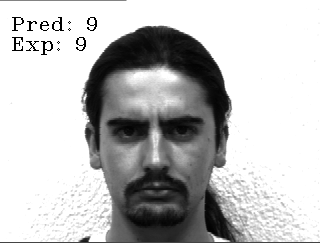

In [21]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

# Classifier evaluation

In [22]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np) # queremos apenas a classe colocamo _ para não retornar o segundo parâmetro;
  #print(previsao)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  #print(saida_esperada)

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [23]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [24]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [25]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [26]:
previsoes

array([11,  4,  9,  4,  9,  5,  3, 13,  4, 15, 12, 10,  3, 12, 14, 14,  4,
        6,  8,  5, 11,  7, 14,  4,  7,  4, 13,  7, 12,  1])

In [27]:
saidas_esperadas

array([11,  4,  9,  1,  7,  5,  3, 13,  2, 15,  2, 10,  3, 12, 14,  6,  4,
        6,  8,  5, 11,  7, 14, 10,  9,  8, 13, 15, 12,  1])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes) # accuracy de 70%;

0.7

In [29]:
len(previsoes)

30

In [30]:
(30 * 70) / 100  # erramos 21

21.0

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

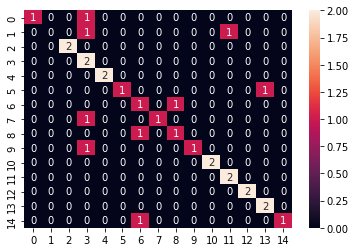

In [32]:
import seaborn
seaborn.heatmap(cm, annot=True);  # os valores 0 indicam que não conseguimos identificar nenhuma das imagens, lenbrando que cada um possui duas fotos;

# Dlib

In [33]:
import dlib

# Detection of facial points

In [34]:
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/OpenCv/Weights/shape_predictor_68_face_landmarks.dat') # vamos pegar nos arquivos um modelo já treinado; 68 pontos que serão localizados facialmente;

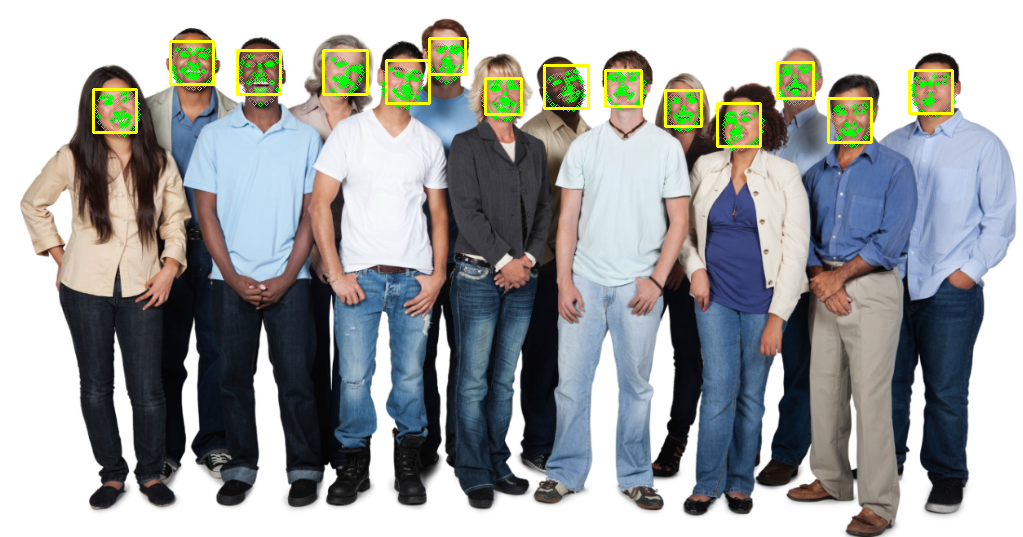

In [35]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/OpenCv/Images/people2.jpg')
deteccoes = detector_face(imagem, 1)
for face in deteccoes:
  pontos = detector_pontos(imagem, face)
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,255,0), 1)


  #print(pontos.parts())
  #print(len(pontos.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(imagem, (l,t), (r, b), (0,255,255), 2)
cv2_imshow(imagem)   # esse seria o detector de pontos;

# Essa é a primeira etapa no dlib, apenas detectar as faces;

# Detection of facial descriptors

In [36]:
# Resnet: https://arxiv.org/abs/1512.03385
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Colab Notebooks/OpenCv/Weights/shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('/content/drive/MyDrive/Colab Notebooks/OpenCv/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [37]:
index = {}
idx = 0
descritores_faciais = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imagem_np, (l,t), (r,b), (0,0,255), 2)

    pontos = detector_pontos(imagem_np, face)
    for ponto in pontos.parts():
      cv2.circle(imagem_np, (ponto.x, ponto.y), 2, (0,255,0), 1)

    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    #print(type(descritor_facial))
    #print(len(descritor_facial))
    #print(descritor_facial)
    descritor_facial = [f for f in descritor_facial]
    #print(descritor_facial)
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    #print(descritor_facial)
    #print(descritor_facial.shape)
    descritor_facial = descritor_facial[np.newaxis, :]
    #print(descritor_facial.shape)
    #print(descritor_facial)

    if descritores_faciais is None:
      descritores_faciais = descritor_facial
    else:
      descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis = 0)
  
    index[idx] = path
    idx += 1
  #cv2_imshow(imagem_np)

In [38]:
descritores_faciais.shape

(132, 128)

In [39]:
descritores_faciais

array([[-0.07416815,  0.04843819, -0.0911288 , ...,  0.01803954,
         0.02821573,  0.02943207],
       [-0.20720406,  0.092355  ,  0.05147148, ..., -0.03726503,
         0.09000882,  0.06165216],
       [-0.043528  ,  0.09274476,  0.01334907, ..., -0.02412482,
         0.06530984,  0.02261347],
       ...,
       [-0.16613589,  0.02577085, -0.01535477, ..., -0.02198661,
         0.07409403,  0.08420551],
       [-0.13725597,  0.03734323,  0.06407321, ...,  0.05849209,
         0.07111271,  0.06592713],
       [-0.1521647 ,  0.06840785,  0.10447605, ..., -0.01414927,
         0.12608856,  0.03556598]])

In [40]:
index

{0: '/content/yalefaces/train/subject05.normal.gif',
 1: '/content/yalefaces/train/subject11.centerlight.gif',
 2: '/content/yalefaces/train/subject12.sleepy.gif',
 3: '/content/yalefaces/train/subject06.rightlight.gif',
 4: '/content/yalefaces/train/subject09.normal.gif',
 5: '/content/yalefaces/train/subject12.happy.gif',
 6: '/content/yalefaces/train/subject06.glasses.gif',
 7: '/content/yalefaces/train/subject11.noglasses.gif',
 8: '/content/yalefaces/train/subject12.leftlight.gif',
 9: '/content/yalefaces/train/subject14.happy.gif',
 10: '/content/yalefaces/train/subject03.centerlight.gif',
 11: '/content/yalefaces/train/subject10.leftlight.gif',
 12: '/content/yalefaces/train/subject12.surprised.gif',
 13: '/content/yalefaces/train/subject04.sleepy.gif',
 14: '/content/yalefaces/train/subject07.surprised.gif',
 15: '/content/yalefaces/train/subject12.glasses.gif',
 16: '/content/yalefaces/train/subject13.wink.gif',
 17: '/content/yalefaces/train/subject06.sad.gif',
 18: '/content

In [41]:
len(index)

132

# Calculating the distance between faces

In [42]:
descritores_faciais[131]

array([-0.1521647 ,  0.06840785,  0.10447605, -0.02429817, -0.09439722,
       -0.02730253, -0.03915561, -0.01371454,  0.16239507, -0.08454876,
        0.19061716,  0.00975848, -0.22374626,  0.00326279,  0.00801554,
        0.1140518 , -0.15477587, -0.11999142, -0.09803677, -0.10489839,
        0.07724056,  0.12368505,  0.01957172,  0.00257868, -0.21577647,
       -0.29984072, -0.1103674 , -0.16262667,  0.01448826, -0.06803855,
       -0.01862221,  0.0277867 , -0.16923374, -0.09419802,  0.02083538,
        0.00797448, -0.05921162, -0.08931874,  0.10728362,  0.01966611,
       -0.13330743, -0.01680487,  0.06045818,  0.26159269,  0.09098873,
        0.10278036,  0.06903937, -0.02109251,  0.01785572, -0.22778326,
        0.07225304,  0.11551025,  0.07276717,  0.05752065,  0.13502653,
       -0.15439092,  0.06632464,  0.08875361, -0.20364888,  0.11608961,
        0.09640192, -0.02915563,  0.02151748, -0.00876997,  0.1844334 ,
        0.08969092, -0.06240286, -0.08404771,  0.13036287, -0.12

In [43]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[131])  # é 0 pois é a mesma face, quanto maior o valor, mais diferente é a face; dessa forma podemos calcular para saber a similaridade;

0.0

In [44]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[130])

0.6650558795371313

In [45]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[129])

0.5551047773791495

In [46]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[128])

0.5506163089126883

In [47]:
np.linalg.norm(descritores_faciais[131] - descritores_faciais[112])

0.7657296167611305

In [48]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais, axis = 1)

array([0.        , 0.82777701, 0.55947716, 0.82816122, 0.7280598 ,
       0.5941517 , 0.71382345, 0.72915309, 0.61324041, 0.77537955,
       0.74155436, 0.82781673, 0.65279357, 0.86624733, 0.77974611,
       0.64791761, 0.64496723, 0.72678979, 0.71094665, 0.76592012,
       0.9308956 , 0.61812241, 0.82654024, 0.64751667, 0.69385054,
       0.7745717 , 0.72558955, 0.66975502, 0.63168534, 0.74718444,
       0.79998291, 0.64955364, 0.69660514, 0.63559507, 0.50525772,
       0.90158802, 0.88173592, 0.90121052, 0.64147563, 0.79643104,
       0.61017057, 0.82573546, 0.6857594 , 0.80782958, 0.8828092 ,
       0.34627169, 0.76734827, 0.67800513, 0.76462076, 0.83302173,
       0.71232861, 0.69126874, 0.76507297, 0.63228556, 0.93748459,
       0.82258438, 0.74187161, 0.68109459, 0.83442488, 0.7783852 ,
       0.85429257, 0.7778528 , 0.85480703, 0.64459745, 0.64955364,
       0.80248198, 0.70313697, 0.75288679, 0.83799224, 0.87083778,
       0.77519368, 0.86727442, 0.33632013, 0.72557719, 0.64248

In [49]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1))

82

In [50]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis = 1)[18]

0.7659201158764237

# Detecção de faces com Dlib

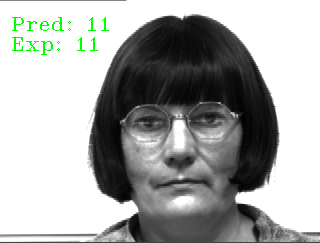

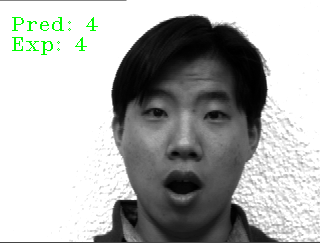

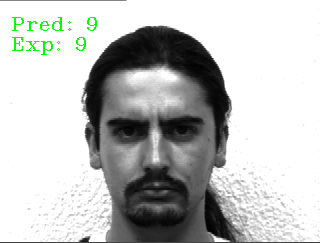

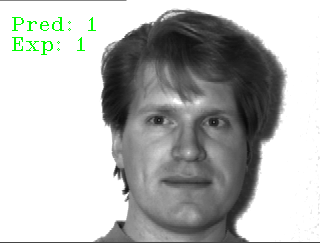

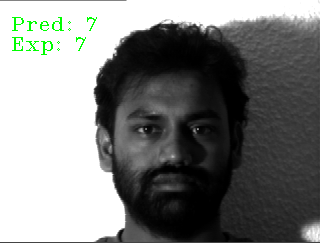

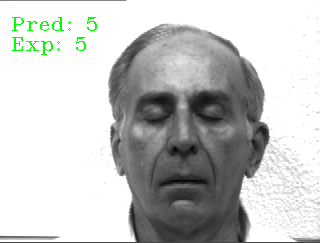

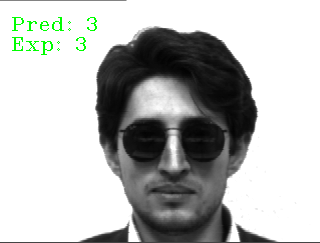

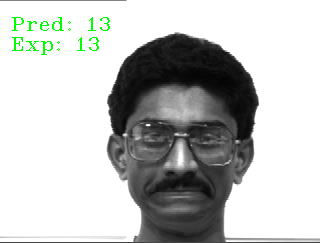

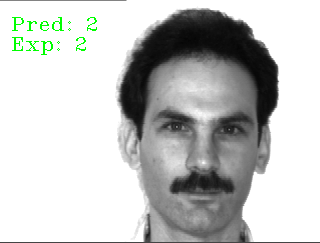

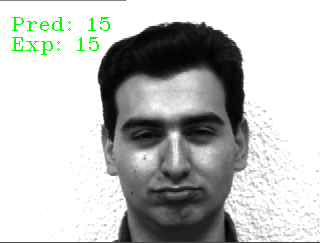

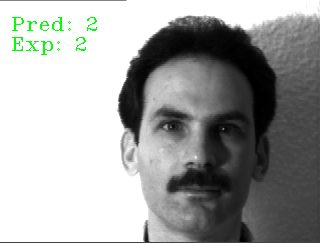

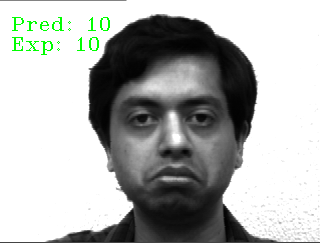

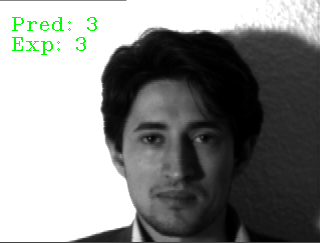

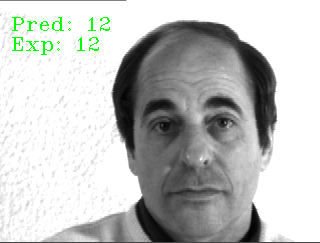

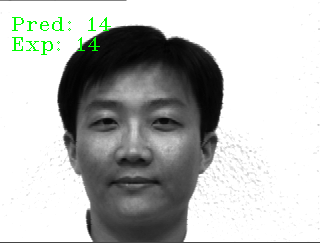

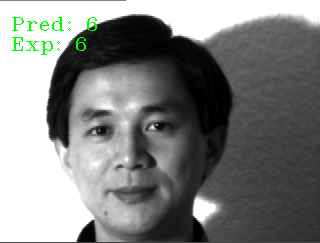

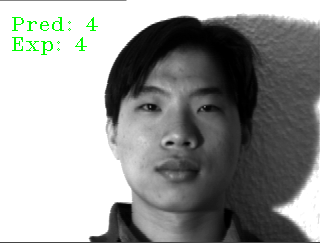

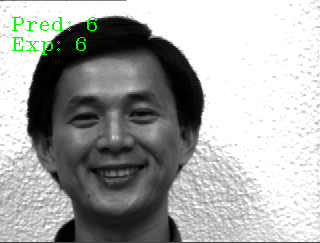

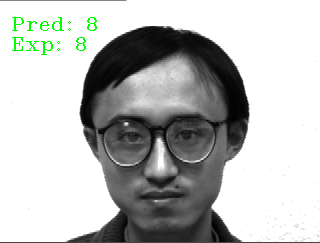

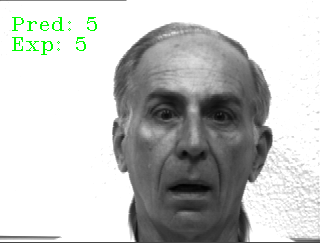

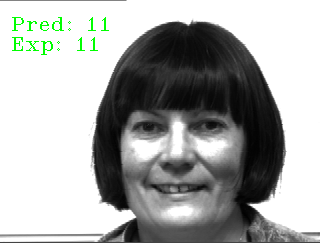

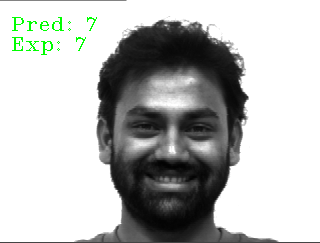

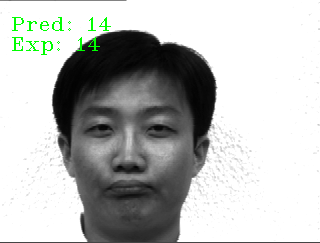

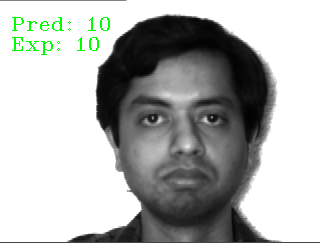

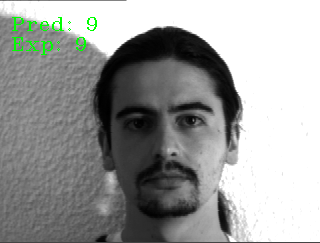

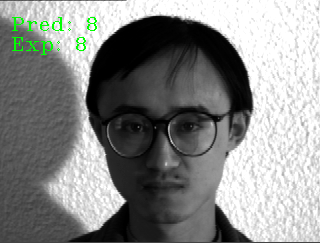

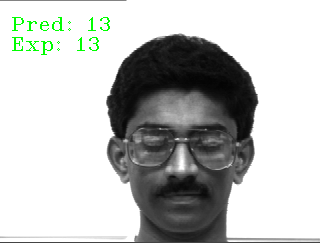

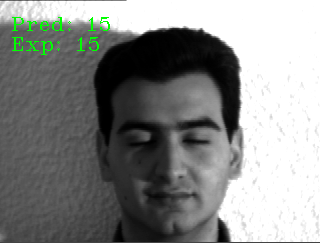

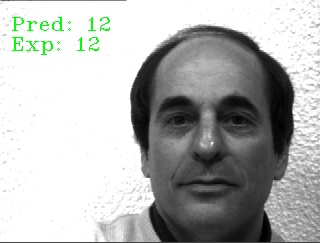

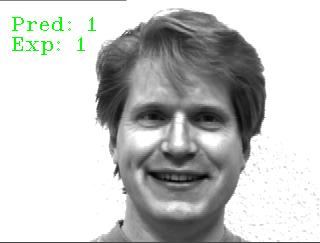

In [51]:
confianca = 0.5
previsoes = []
saidas_esperadas = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('RGB')
  imagem_np = np.array(imagem, 'uint8')
  deteccoes = detector_face(imagem_np, 1)
  for face in deteccoes:
    pontos = detector_pontos(imagem_np, face)
    descritor_facial = descritor_facial_extrator.compute_face_descriptor(imagem_np, pontos)
    descritor_facial = [f for f in descritor_facial]
    descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
    descritor_facial = descritor_facial[np.newaxis, :]

    distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis = 1)
    indice_minimo = np.argmin(distancias)
    distancia_minima = distancias[indice_minimo]
    if distancia_minima <= confianca:
      nome_previsao = int(os.path.split(index[indice_minimo])[1].split('.')[0].replace('subject', ''))
    else:
      nome_previsao = 'Face não identificada'

    nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    previsoes.append(nome_previsao)
    saidas_esperadas.append(nome_real)

    cv2.putText(imagem_np, 'Pred: ' + str(nome_previsao), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(imagem_np, 'Exp: ' + str(nome_real), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))

  cv2_imshow(imagem_np)

previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [52]:
previsoes

array([11,  4,  9,  1,  7,  5,  3, 13,  2, 15,  2, 10,  3, 12, 14,  6,  4,
        6,  8,  5, 11,  7, 14, 10,  9,  8, 13, 15, 12,  1])

In [53]:
saidas_esperadas

array([11,  4,  9,  1,  7,  5,  3, 13,  2, 15,  2, 10,  3, 12, 14,  6,  4,
        6,  8,  5, 11,  7, 14, 10,  9,  8, 13, 15, 12,  1])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

1.0